In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ND = pd.read_csv('./Percobaan.txt', sep = '\t')
ND['ln(N0)']=ND.apply(lambda row : np.log(row['R_A / 1/s']), axis = 1)
print(ND)

       t / s  R_A / 1/s    ln(N0)
0     9.9970        1.5  0.405465
1    20.1920       67.7  4.215086
2    30.3970       62.2  4.130355
3    40.5920       55.8  4.021774
4    50.7910       51.2  3.935740
..       ...        ...       ...
71  733.9969        2.2  0.788457
72  744.0930        2.3  0.832909
73  754.2950        3.6  1.280934
74  764.4440        3.2  1.163151
75  774.6440        1.9  0.641854

[76 rows x 3 columns]


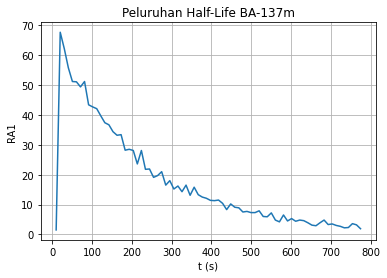

In [4]:
x = ND["t / s"]
y = ND["R_A / 1/s"]

plt.plot(x, y)
plt.xlabel("t (s)")
plt.ylabel("RA1")
plt.title("Peluruhan Half-Life BA-137m")
plt.grid()
plt.show()

Persamaan:
y = -0.00396647259030201 x + 3.9897718972165532
Kesalahan: 
delta m =  0.0002255131029735364 
delta c =  0.10186159668116698


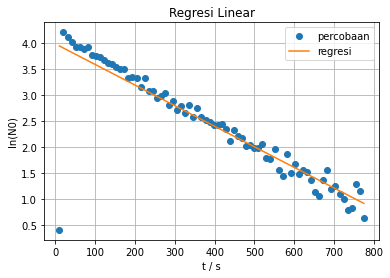

                            OLS Regression Results                            
Dep. Variable:                 ln(N0)   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     309.4
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.79e-28
Time:                        18:43:09   Log-Likelihood:                -44.405
No. Observations:                  76   AIC:                             92.81
Df Residuals:                      74   BIC:                             97.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9898      0.102     39.169      0.0

In [7]:
x = ND["t / s"]
y = ND["ln(N0)"]
x_const = sm.add_constant(x)
hasil = sm.OLS(y, x_const).fit()

const = hasil.params[0]
grad = hasil.params[1]
print("Persamaan:\ny =", grad, "x +", const)

grad_err = hasil.bse[1]
const_err = hasil.bse[0]
print("Kesalahan: \ndelta m = ", grad_err, "\ndelta c = ", const_err)

y_predict = grad*x + const
plt.plot(x, y,'o', label = 'percobaan')
plt.plot(x, y_predict, label = 'regresi')
plt.legend()
plt.xlabel("t / s")
plt.ylabel("ln(N0)")
plt.title("Regresi Linear")
plt.grid()
plt.show()


print(hasil.summary())